In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import pyro
import pyro.distributions as dist
from pyro.infer import SVI
from pyro.optim import Adam

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style('oceans16')
%matplotlib inline

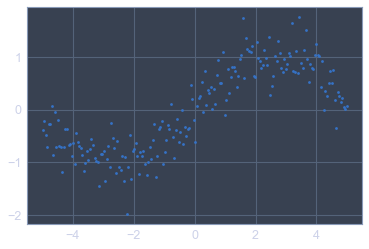

In [13]:
N = 200 # data size
D = 1 # n. features

x = np.linspace(-5, 5, N)
y = np.sin(0.6*x) + 0.3*np.random.randn(N)
plt.plot(x, y,'.')

In [22]:
class RegModel(nn.Module):
    def __init__(self, p):
        super(RegModel, self).__init__()
        self.linear = nn.Linear(p, 1)
        
    def forward(self, x):
        return F.tanh(self.linear(x))

In [28]:
# regular training
model = RegModel(y_.size(0))
loss_fn = torch.nn.MSELoss(size_average=False)
optim = torch.optim.Adam(model.parameters(), lr=0.01)
y_ = Variable(torch.FloatTensor(y))
x_ = Variable(torch.FloatTensor(x))

for t in range(100):
    y_pred = model(x_)
    loss = loss_fn(y_pred, y_)
    optim.zero_grad()
    loss.backward()
    optim.step()

RuntimeError: input and target have different number of elements: input[1] has 1 elements, while target[200] has 200 elements at d:\pytorch\pytorch\torch\lib\thnn\generic/MSECriterion.c:13

In [30]:
model(x_)

Variable containing:
-0.5456
[torch.FloatTensor of size 1]